In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
m = 0.7
c = 0.3

X = np.arange(0, 1, 0.02)
y = m*X + c

print("Shape of X : ",X.shape)
print("Shape of y : ",y.shape)

Shape of X :  (50,)
Shape of y :  (50,)


In [3]:
split = int(len(X)*0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:]
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(40,) (40,)
(10,) (10,)


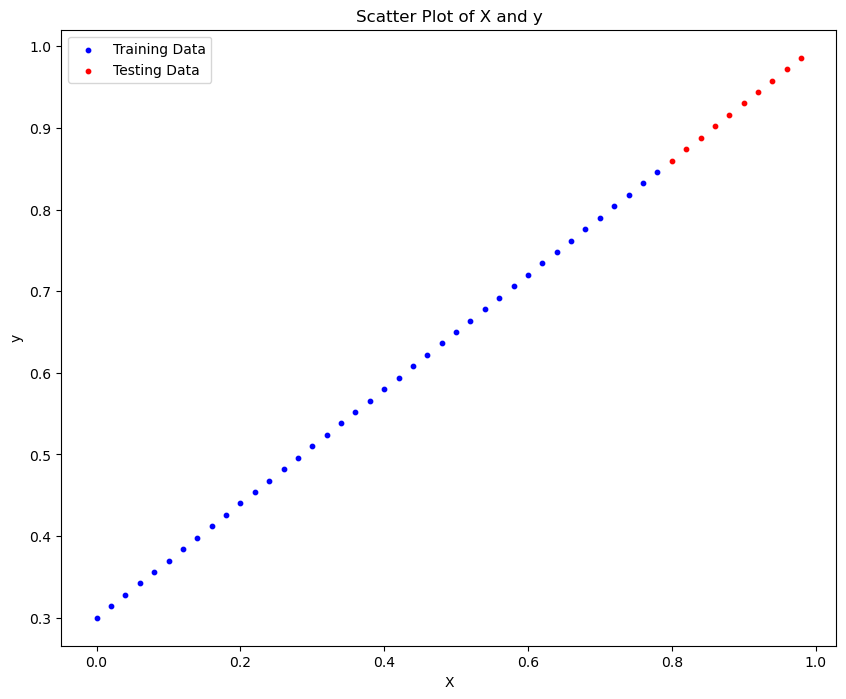

In [4]:
def plot_data(X_train = X_train, y_train=y_train, X_test=X_test, y_test=y_test, predictions=None):
    plt.figure(figsize=(10,8))
    plt.scatter(X_train, y_train, c='b', s=10, label='Training Data')
    plt.scatter(X_test, y_test, c='r', s=10, label='Testing Data')
    if predictions is not None:
        plt.scatter(X_test, predictions, c='g', s=10, label='Predicted Data')
    
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.title("Scatter Plot of X and y")

plot_data()

In [5]:
W = np.random.randn(1)
b = np.random.randn(1)
print(W, b)

[-0.65190261] [0.48875145]


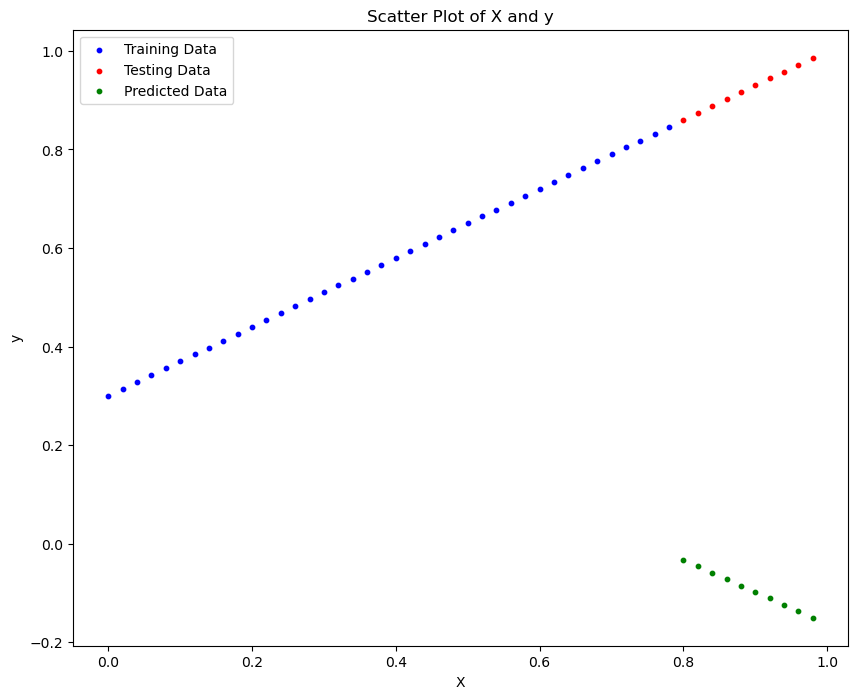

In [6]:
y_out = X_test * W + b
plot_data(predictions=y_out)

In [7]:
def loss_fn(y_true, y_pred):
    return np.sum(np.square(y_true-y_pred))/len(y_true)

In [8]:
# Build the training loop

epochs = 500
alpha = 0.1
trainLossList = []
testLossList = []

for epoch in range (epochs):
    # Forward Pass
    y_pred  = X_train * W + b

    # Compute train loss
    train_loss = loss_fn(y_true=y_train, y_pred=y_pred)
    trainLossList.append(train_loss)

    # Compute the gradient
    gradientW = (-2*np.sum((y_train-y_pred)*X_train))/len(y_train)
    gradientb = (-2*np.sum(y_train-y_pred))/len(y_train)

    # Backpropagate
    W = W - alpha * gradientW
    b = b - alpha * gradientb

    # Compute Test loss
    test_pred = X_test*W + b
    test_loss = loss_fn(y_true=y_test, y_pred=test_pred)
    testLossList.append(test_loss)

    if(epoch%10 == 0):
        print(f"Epoch: {epoch} | Train Loss: {train_loss:.5f} | Test Loss: {test_loss:.5f}")

Epoch: 0 | Train Loss: 0.21199 | Test Loss: 0.83454
Epoch: 10 | Train Loss: 0.06754 | Test Loss: 0.31282
Epoch: 20 | Train Loss: 0.05560 | Test Loss: 0.24052
Epoch: 30 | Train Loss: 0.04622 | Test Loss: 0.19871
Epoch: 40 | Train Loss: 0.03842 | Test Loss: 0.16511
Epoch: 50 | Train Loss: 0.03194 | Test Loss: 0.13725
Epoch: 60 | Train Loss: 0.02655 | Test Loss: 0.11410
Epoch: 70 | Train Loss: 0.02207 | Test Loss: 0.09486
Epoch: 80 | Train Loss: 0.01835 | Test Loss: 0.07886
Epoch: 90 | Train Loss: 0.01525 | Test Loss: 0.06555
Epoch: 100 | Train Loss: 0.01268 | Test Loss: 0.05450
Epoch: 110 | Train Loss: 0.01054 | Test Loss: 0.04530
Epoch: 120 | Train Loss: 0.00876 | Test Loss: 0.03766
Epoch: 130 | Train Loss: 0.00729 | Test Loss: 0.03131
Epoch: 140 | Train Loss: 0.00606 | Test Loss: 0.02603
Epoch: 150 | Train Loss: 0.00504 | Test Loss: 0.02164
Epoch: 160 | Train Loss: 0.00419 | Test Loss: 0.01799
Epoch: 170 | Train Loss: 0.00348 | Test Loss: 0.01495
Epoch: 180 | Train Loss: 0.00289 | Test

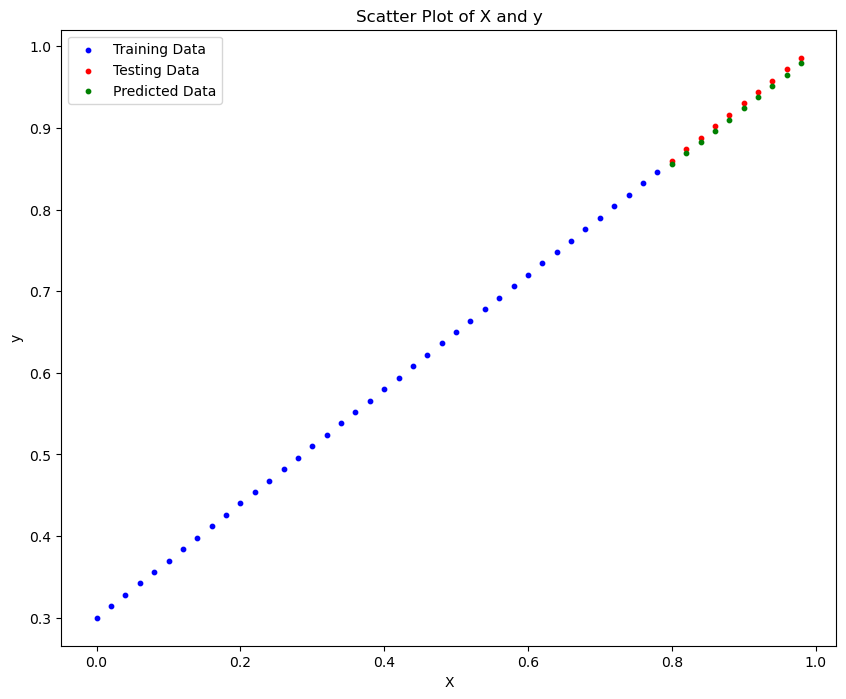

In [9]:
y_out = X_test*W + b
plot_data(predictions=y_out)

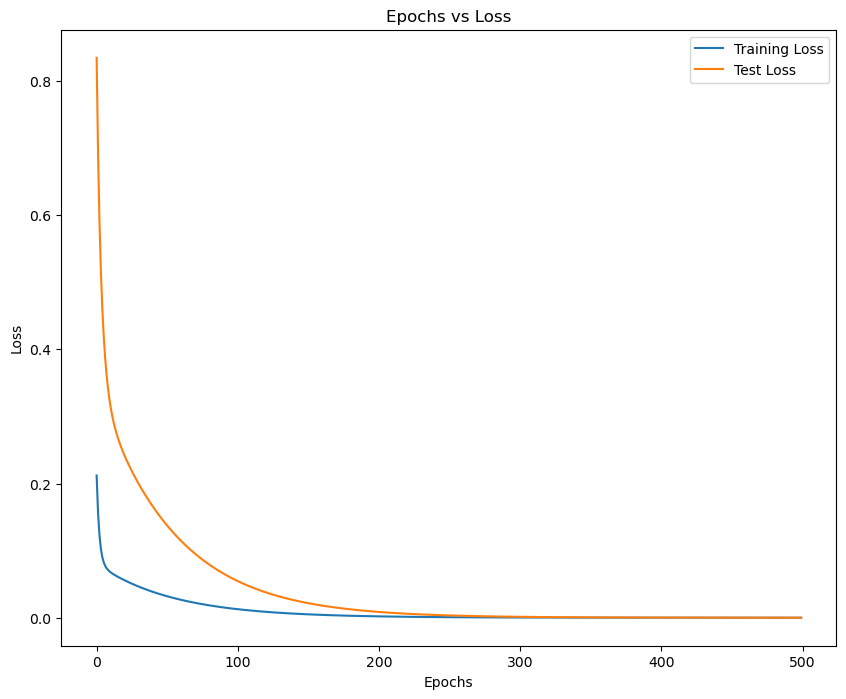

In [10]:
# Plot Loss Curve
# This curve is must for neural network 
plt.figure(figsize=(10, 8))
plt.plot(range(epochs), trainLossList, label="Training Loss")
plt.plot(range(epochs), testLossList, label="Test Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.legend()